<a href="https://colab.research.google.com/github/JungsikNoh/yFinance_SPYperformances/blob/main/Copy_of_yFinance_SPYperformances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SPY performance comparison using yahoo finance

## Library

In [ ]:
# Library
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

## Calculate total return index


====
Download SPY from 1995-01-01 to 2025-12-07


[*********************100%***********************]  1 of 1 completed



====
Total Return Index df
Ticker            SPY
Date                 
1995-01-01   1.000000
1995-02-01   1.028327
1995-03-01   1.063822
1995-04-01   1.103209
1995-05-01   1.129974
...               ...
2025-08-01  23.253314
2025-09-01  23.947116
2025-10-01  25.070407
2025-11-01  25.628861
2025-12-01  25.513720

[372 rows x 1 columns]


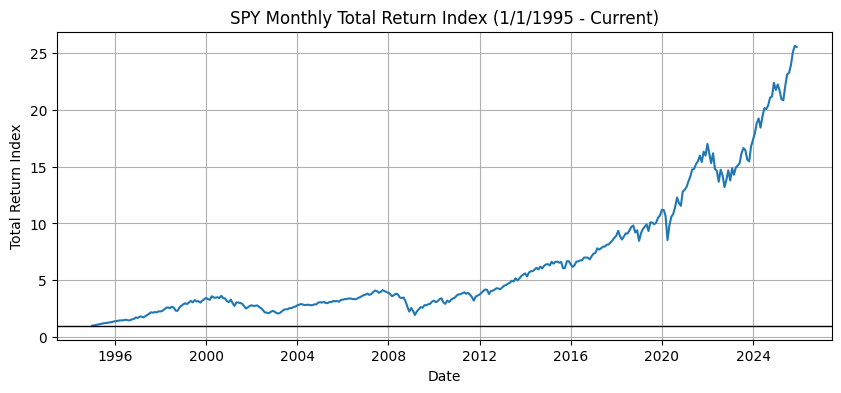

In [ ]:
## 1. Parameters

ticker = "SPY"
invenstment_value = 1000000
holding_years = 15
start_date0 = pd.Timestamp("1995-01-01").date()
end_date0 = pd.Timestamp.today().date()
start_dates = [pd.Timestamp("1995-01-01"),
               pd.Timestamp("2000-01-01"),
               pd.Timestamp("2005-01-01"),
               pd.Timestamp("2008-01-01")
]

## 2. Download SPY time series (adj close)

print('\n====')
print(f"Download SPY from {start_date0} to {end_date0}")
raw = yf.download(ticker, start=start_date0, end=end_date0+timedelta(days=1), auto_adjust=False)
raw_adjClose = raw['Adj Close']

## 3. Calculate monthly Total Return Indexes (TRI)

spy_monthly = raw_adjClose.resample("MS").first()
TRI = spy_monthly/spy_monthly.iloc[0]
print("\n====")
print("Total Return Index df")
print(TRI)

plt.figure(figsize=(10, 4))
plt.plot(TRI.index, TRI.values)
plt.title("SPY Monthly Total Return Index (1/1/1995 - Current)")
plt.xlabel("Date")
plt.ylabel("Total Return Index")
plt.grid(True)
plt.axhline(y=1, color='k', linewidth=1)
plt.show()

# Output dataframe
investment_performance = pd.DataFrame(data=start_dates, columns=['start_date'])
end_dates = pd.Series(start_dates) + pd.DateOffset(years=holding_years)
investment_performance['end_date'] = end_dates
investment_performance.index = start_dates
investment_performance['TRI_start'] = TRI.loc[start_dates].values
investment_performance['TRI_end'] = TRI.loc[end_dates].values
investment_performance['Ratio'] = investment_performance['TRI_end'] / investment_performance['TRI_start']
investment_performance['Value After holding'] = invenstment_value * investment_performance['Ratio']

## SPY performance comparison

In [ ]:
# SPY performances after holding X-years
investment_performance

,start_date,end_date,TRI_start,TRI_end,Ratio,Value After holding
1995-01-01,1995-01-01,2010-01-01,1.000000,3.198420,3.198420,3.198420e+06
2000-01-01,2000-01-01,2015-01-01,3.446277,6.416917,1.861985,1.861985e+06
2005-01-01,2005-01-01,2020-01-01,3.069700,11.198277,3.648003,3.648003e+06
2008-01-01,2008-01-01,2023-01-01,3.903734,13.770095,3.527416,3.527416e+06


## Best/worst cases

In [ ]:
## 4. Identify best & worst start dates
best_row = investment_performance.loc[investment_performance["Value After holding"].idxmax()]
worst_row = investment_performance.loc[investment_performance["Value After holding"].idxmin()]

print("\nBest case:")
print("----------------")
print(best_row)

print("\nWorst case:")
print("----------------")
print(worst_row)


Best case:
----------------
start_date             2005-01-01 00:00:00
end_date               2020-01-01 00:00:00
TRI_start                           3.0697
TRI_end                          11.198277
Ratio                             3.648003
Value After holding         3648003.158875
Name: 2005-01-01 00:00:00, dtype: object

Worst case:
----------------
start_date             2000-01-01 00:00:00
end_date               2015-01-01 00:00:00
TRI_start                         3.446277
TRI_end                           6.416917
Ratio                             1.861985
Value After holding         1861985.243171
Name: 2000-01-01 00:00:00, dtype: object


## Interpretation

### - How investment timing affects outcomes
Investment timing in SPY matters. A \$1 M investment held for 15 years across four different start dates returned final values between \$1.86 M (1/2000--1/2015) and \$3.65 M (1/2005--1/2020), almost a twofold difference. Yet even the worst outcome still earned about 4.2% annually, highlighting SPY as a strong, relatively low-risk long-term asset.

### - General guidance for investors
As shown in the total return index chart above, long-term investment in SPY (10+ years) has historically produced positive outcomes with minimal drawdown risk. Even in the least favorable of the four scenarios analyzed, the annualized return was around 4%, while more recent periods approach roughly 10% per year. Overall, SPY is a solid, low-risk asset for long-term wealth accumulation.

